In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd

import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 로지스틱 회귀
from statsmodels.api import Logit
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# 샘플링 : Over-sampling 등
from imblearn.over_sampling import SMOTE


# Check the Frequency of Variable
from collections import Counter

In [2]:
# 한글 폰트 적용, 차트에서 음수 표시
matplotlib.rc('font', family='NanumGothic')
matplotlib.rc("axes", unicode_minus = False)

In [3]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    #print(v_data.head()) <- Text format... 식별 불편
    # v_data.head()  <- 직접 적용 안됨

# 탐색적 분석

In [4]:
df_raw = pd.read_csv('../code_file/data_folder/SCALE불량.csv', encoding='euc-kr')
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

In [6]:
df_raw.corr()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
PT_THK,1.000000,-0.313151,-0.862618,-0.397391,-0.002530,-0.523926,0.171835,-0.694770,0.269365,0.413009,-0.687565,-0.373976,-0.836631
PT_WDTH,-0.313151,1.000000,0.119726,0.031009,0.006727,0.180024,-0.126002,0.227296,-0.051361,-0.393200,0.216078,-0.021807,0.337540
PT_LTH,-0.862618,0.119726,1.000000,0.451815,-0.021185,0.473111,-0.090338,0.645402,-0.230159,-0.251950,0.641330,0.312762,0.809280
PT_WGT,-0.397391,0.031009,0.451815,1.000000,-0.022241,0.153331,0.007292,0.359513,-0.193112,-0.057776,0.361377,0.263216,0.238986
FUR_NO_ROW,-0.002530,0.006727,-0.021185,-0.022241,1.000000,0.004753,-0.007522,0.009228,0.062408,0.016053,0.013799,-0.004372,0.018219
FUR_HZ_TEMP,-0.523926,0.180024,0.473111,0.153331,0.004753,1.000000,-0.112438,0.772907,-0.327912,-0.348223,0.758185,0.265310,0.470899
FUR_HZ_TIME,0.171835,-0.126002,-0.090338,0.007292,-0.007522,-0.112438,1.000000,-0.210175,0.067994,0.483407,-0.196404,0.010149,-0.152363
FUR_SZ_TEMP,-0.694770,0.227296,0.645402,0.359513,0.009228,0.772907,-0.210175,1.000000,-0.566177,-0.477177,0.985245,0.452297,0.648646
FUR_SZ_TIME,0.269365,-0.051361,-0.230159,-0.193112,0.062408,-0.327912,0.067994,-0.566177,1.000000,0.490728,-0.565912,-0.268844,-0.285524
FUR_TIME,0.413009,-0.393200,-0.251950,-0.057776,0.016053,-0.348223,0.483407,-0.477177,0.490728,1.000000,-0.467894,-0.199352,-0.366708


In [7]:
match_dict = {'불량': 1, '양품': 0}
df_raw['SCALE'] = df_raw['SCALE'].map(match_dict)
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,1,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,0,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,0,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,0,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,적용,10,2조


In [8]:
df_raw = df_raw.drop(["PLATE_NO", 'ROLLING_DATE'], axis = 1, inplace = False)

In [9]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw)

# 설명변수, 목표변수 데이터 지정
df_raw_x = df_raw_dummy.drop(["SCALE"], axis = 1, inplace = False)
df_raw_y = df_raw_dummy["SCALE"] 

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

## 로지스틱 회귀(1)_unscaled

In [10]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_raw, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (504, 19)
test data size : (216, 19)


In [39]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, # 데이터
                                                   test_size = 0.3, # test 데이터의 비율
                                                   random_state = 1234)  # random state

In [40]:
fun_data_layout(df_raw)

Data 구조: (720, 19)

변수 :  Index(['SCALE', 'SPEC', 'STEEL_KIND', 'PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT',
       'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP',
       'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'HSB',
       'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')



In [41]:
'+'.join(df_raw.columns)

'SCALE+SPEC+STEEL_KIND+PT_THK+PT_WDTH+PT_LTH+PT_WGT+FUR_NO+FUR_NO_ROW+FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+HSB+ROLLING_DESCALING+WORK_GR'

In [42]:
log_model = Logit.from_formula("SCALE~ROLLING_TEMP_T5 + C(HSB) + FUR_SZ_TEMP + ROLLING_DESCALING""", df_train)

# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.280383
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      499
Method:                           MLE   Df Model:                            4
Date:                Wed, 09 Mar 2022   Pseudo R-squ.:                  0.5513
Time:                        20:46:01   Log-Likelihood:                -141.31
converged:                      False   LL-Null:                       -314.97
Covariance Type:            nonrobust   LLR p-value:                 6.668e-74
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -83.3890   7284.213     -0.011      0.991   -1.44e+04    1.42e+04
C(HSB)[T.적용]        -24.7372   7284.193     

/home/piai/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["SCALE"],y_pred_train_class)),"\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")

# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["SCALE"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["SCALE"],y_pred_train_class)),"\n")
print(classification_report(df_train["SCALE"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")
print(classification_report(df_test["SCALE"], y_pred_test_class, digits=3))

Confusion Matrix: 
[[316  28]
 [ 34 126]] 

Confusion Matrix: 
[[126  19]
 [ 11  60]] 

Train 예측/분류 결과
Accuracy: 0.877

Confusion Matrix: 
[[316  28]
 [ 34 126]] 

              precision    recall  f1-score   support

           0      0.903     0.919     0.911       344
           1      0.818     0.787     0.803       160

    accuracy                          0.877       504
   macro avg      0.861     0.853     0.857       504
weighted avg      0.876     0.877     0.876       504

Test 예측/분류 결과
Accuracy: 0.861

Confusion Matrix: 
[[126  19]
 [ 11  60]] 

              precision    recall  f1-score   support

           0      0.920     0.869     0.894       145
           1      0.759     0.845     0.800        71

    accuracy                          0.861       216
   macro avg      0.840     0.857     0.847       216
weighted avg      0.867     0.861     0.863       216



In [44]:
# 0과 1의 값을 가진 class로 변환: 임계값 변경-> 예측 빈도 달라짐
y_pred_test_class = (y_pred_test > 0.6).astype(int)
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")

Confusion Matrix: 
[[129  16]
 [ 16  55]] 



In [45]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["SCALE"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["SCALE"],y_pred_train_class)),"\n")
print(classification_report(df_train["SCALE"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")
print(classification_report(df_test["SCALE"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.877

Confusion Matrix: 
[[316  28]
 [ 34 126]] 

              precision    recall  f1-score   support

           0      0.903     0.919     0.911       344
           1      0.818     0.787     0.803       160

    accuracy                          0.877       504
   macro avg      0.861     0.853     0.857       504
weighted avg      0.876     0.877     0.876       504

Test 예측/분류 결과
Accuracy: 0.852

Confusion Matrix: 
[[129  16]
 [ 16  55]] 

              precision    recall  f1-score   support

           0      0.890     0.890     0.890       145
           1      0.775     0.775     0.775        71

    accuracy                          0.852       216
   macro avg      0.832     0.832     0.832       216
weighted avg      0.852     0.852     0.852       216



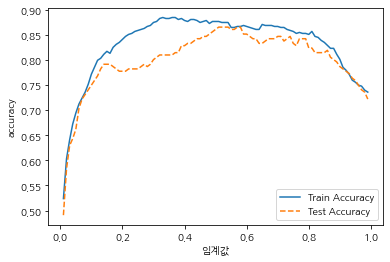

In [47]:
train_list = []
test_list = []
for i in range(1,100):
    j = i*0.01
    # 0과 1의 값을 가진 class로 변환
    y_pred_train_class = (y_pred_train > j).astype(int)
    y_pred_test_class = (y_pred_test > j).astype(int)
    train_score = accuracy_score(df_train["SCALE"], y_pred_train_class)
    test_score = accuracy_score(df_test["SCALE"], y_pred_test_class)
    train_list.append(train_score)
    test_list.append(test_score)

df = pd.DataFrame({'train': train_list, 'test': test_list})

index = [0.01*i for i in range(1,100)]

# 모델 정확도 그래프 확인
plt.plot(index, train_list, linestyle = "-", label = "Train Accuracy")
plt.plot(index, test_list, linestyle = "--", label = "Test Accuracy")
plt.xlabel("임계값"); plt.ylabel("accuracy")
plt.legend()

In [48]:
df.describe()

,train,test
count,99.000000,99.000000
mean,0.831089,0.800505
std,0.065476,0.061137
min,0.523810,0.490741
25%,0.812500,0.782407
50%,0.859127,0.814815
75%,0.872024,0.842593
max,0.884921,0.865741


In [49]:
df[df['test'].round(5) == 0.86574]

,train,test
50,0.876984,0.865741
51,0.875000,0.865741
52,0.875000,0.865741
53,0.875000,0.865741
56,0.867063,0.865741
57,0.867063,0.865741


<AxesSubplot:>

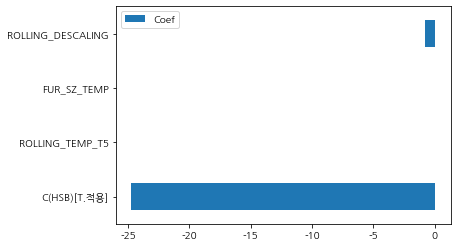

In [50]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

## 로지스틱 회귀(2) _ scaled

#### 표준화 회귀 계수

In [51]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char],axis = 1)
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,SPEC,STEEL_KIND,FUR_NO,HSB,WORK_GR
0,-0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,-0.816535,0.000734,-0.19693,AB/EH32-TM,T1,1호기,적용,2조
1,-0.687308,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,-1.096730,0.028567,-0.19693,AB/EH32-TM,T1,1호기,적용,2조
2,-0.687308,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,-1.881276,-0.416748,-0.19693,NV-E36-TM,T8,2호기,적용,3조
3,-0.687308,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,0.340311,-1.489003,-0.453858,-0.19693,NV-E36-TM,T8,2호기,적용,3조
4,-0.687308,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,0.296219,-1.208808,-0.565186,-0.19693,BV-EH36-TM,T8,3호기,적용,1조


In [52]:
df_scaled['SCALE']

0     -0.687308
1     -0.687308
2     -0.687308
3     -0.687308
4     -0.687308
         ...   
715    1.454951
716   -0.687308
717   -0.687308
718   -0.687308
719   -0.687308
Name: SCALE, Length: 720, dtype: float64

In [53]:
# BAD 데이터를 0과 1로 변환, np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled["SCALE"] = np.where(df_scaled["SCALE"]> 0, 1, 0)
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,SPEC,STEEL_KIND,FUR_NO,HSB,WORK_GR
0,0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,-0.816535,0.000734,-0.19693,AB/EH32-TM,T1,1호기,적용,2조
1,0,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,-1.096730,0.028567,-0.19693,AB/EH32-TM,T1,1호기,적용,2조
2,0,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,-1.881276,-0.416748,-0.19693,NV-E36-TM,T8,2호기,적용,3조
3,0,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,0.340311,-1.489003,-0.453858,-0.19693,NV-E36-TM,T8,2호기,적용,3조
4,0,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,0.296219,-1.208808,-0.565186,-0.19693,BV-EH36-TM,T8,3호기,적용,1조


In [54]:
len(df_scaled[df_scaled['SCALE'] == 1])

231

In [55]:
# # 데이터 분할
# df_scaled_train, df_scaled_test = train_test_split(df_scaled, # 데이터
#                                                    test_size = 0.3, # test 데이터의 비율
#                                                    random_state = 1234)  # random state

In [56]:
# # from_formula 함수를 이용하여 변수 역할 지정
# # 분석 대상 이벤트=“1”
# log_model = Logit.from_formula("SCALE~ROLLING_TEMP_T5 + C(HSB) + FUR_SZ_TEMP + ROLLING_DESCALING""", df_scaled_train)

# # 적합
# log_result = log_model.fit()

# # 결과 출력
# print(log_result.summary())

In [57]:
# # train 데이터 예측
# y_pred_train = log_result.predict(df_train)
# # 0과 1의 값을 가진 class로 변환
# y_pred_train_class = (y_pred_train > 0.4).astype(int)
# print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["SCALE"],y_pred_train_class)),"\n")

# # test 데이터 예측
# y_pred_test = log_result.predict(df_test)
# # 0과 1의 값을 가진 class로 변환
# y_pred_test_class = (y_pred_test > 0.5).astype(int)
# print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")

# # 실제 train 데이터와 예측 결과 비교
# print("Train 예측/분류 결과")
# print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["SCALE"], y_pred_train_class)))
# print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["SCALE"],y_pred_train_class)),"\n")
# print(classification_report(df_train["SCALE"], y_pred_train_class, digits=3))

# # 실제 train 데이터와 예측 결과 비교
# print("Test 예측/분류 결과")
# print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_test_class)))
# print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"],y_pred_test_class)),"\n")
# print(classification_report(df_test["SCALE"], y_pred_test_class, digits=3))

In [58]:
# train_list = []
# test_list = []
# for i in range(1,100):
#     j = i*0.01
#     # 0과 1의 값을 가진 class로 변환
#     y_pred_train_class = (y_pred_train > j).astype(int)
#     y_pred_test_class = (y_pred_test > j).astype(int)
#     train_score = accuracy_score(df_train["SCALE"], y_pred_train_class)
#     test_score = accuracy_score(df_test["SCALE"], y_pred_test_class)
#     train_list.append(train_score)
#     test_list.append(test_score)

# df = pd.DataFrame({'train': train_list, 'test': test_list})

# index = [i for i in range(1,100)]

# # 모델 정확도 그래프 확인
# plt.plot(index, train_list, linestyle = "-", label = "Train Accuracy")
# plt.plot(index, test_list, linestyle = "--", label = "Test Accuracy")
# plt.xlabel("임계값"); plt.ylabel("accuracy")
# plt.legend()

# 의사결정 나무

In [59]:
# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')

# train데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x,df_train_y)

# 결과 확인
print('Over-Sampling 전:\n',df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X: {}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y: {} \n'.format(y_resampled.shape))

print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))

Over-Sampling 전:
 0    344
1    160
Name: SCALE, dtype: int64 

Over-Sampling 후 Train X: (688, 97)
Over-Sampling 후 Train Y: (688,) 

Over-Sampling 후 '1':344
Over-Sampling 후 '0':344


In [60]:
# 목표변수 빈도 확인
print(df_raw.value_counts(["SCALE"]),"\n")
# print(df_raw["BAD"].value_counts(), "\n")
print("불량 비율  ", df_raw.value_counts(df_raw["SCALE"]==1)/len(df_raw))

SCALE
0        489
1        231
dtype: int64 

불량 비율   SCALE
False    0.679167
True     0.320833
dtype: float64


In [61]:
para_depth = [depth for depth in range(1, 11)]
para_split = [n_split * 1 for n_split in range(1, 11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

In [94]:
estimator = DecisionTreeClassifier(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(x_resampled, y_resampled)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=1234)

best parameter: 
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8}

best score: 
0.972


/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/home/piai/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer g

In [95]:
# 분석 모델
model = ["DecisionTree", "RandomForest", "GradientBoosting", "NeuralNet"]

# 정확도 저장
train_accuracy = []; test_accuracy = []
# auc score 저장
model_auc = []

# Precision, Recall score 저장
model_precision = []; model_recall = []
# f1 score 저장
model_f1_score = []

In [99]:
dt_final = DecisionTreeClassifier(max_depth=10
                                           , min_samples_leaf=1
                                           , min_samples_split=8, random_state= 1234)

dt_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=1234)

In [100]:
# train 정확도
train_accuracy.append(dt_final.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(dt_final.score(df_test_x, df_test_y))

# 예측값
y_pred = dt_final.predict(df_test_x)

# roc_curve(실제값, 예측값), fpr = FP/(FP+TN): 거짓 양성 비율, tpr = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)

In [101]:
print(dt_final.score(df_train_x, df_train_y))
print(dt_final.score(df_test_x, df_test_y))

0.9880952380952381
0.9953703703703703


In [102]:
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

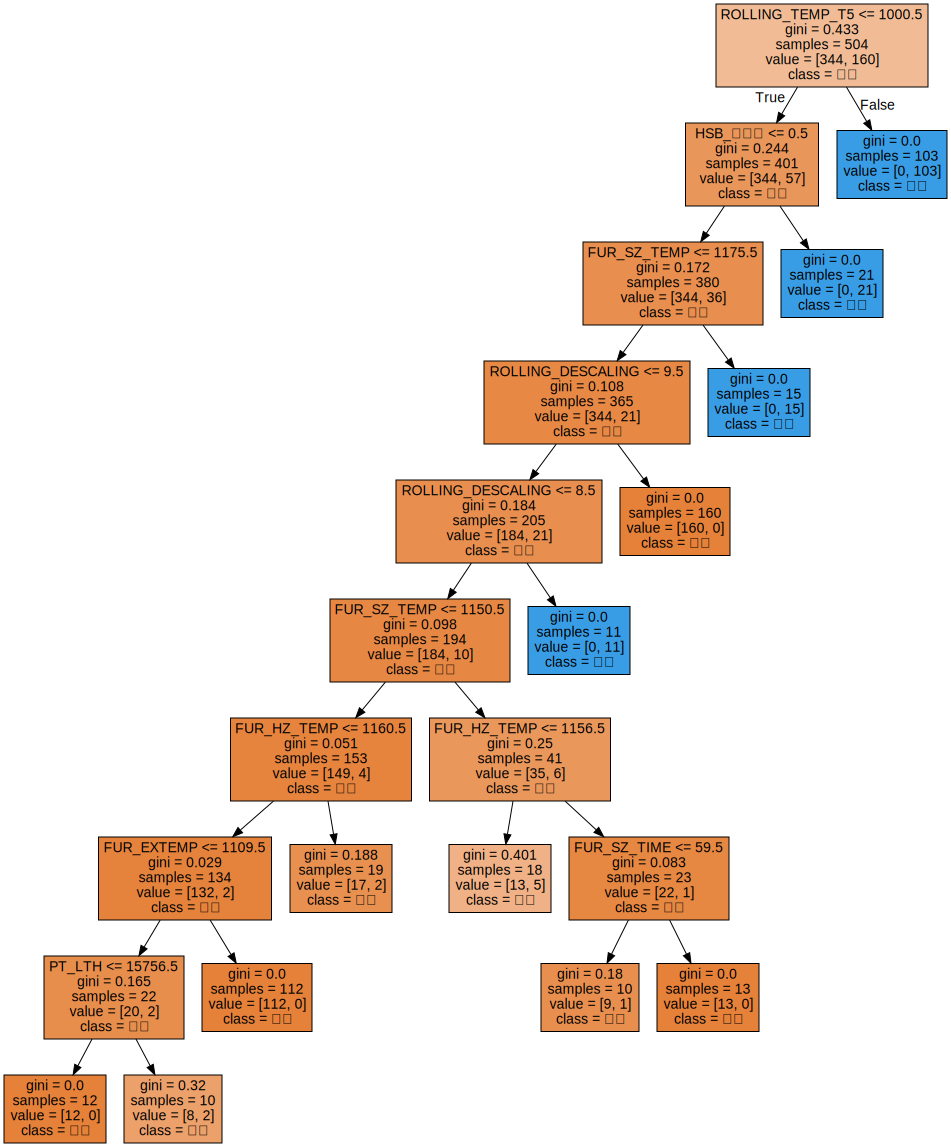

In [105]:
# 변수명 저장
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 10, min_samples_split= 8, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장. (목표변수, 0: Good, 1: Bad)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["양품", "불량"], # 목표변수 값이 숫자-> Label 직접 지정
                # class_names = tree_low.classes_,원래 목표변수 값이 법주형 -> 모델 keyword 사용           
                feature_names = v_feature_name, impurity = True, filled = True)
# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [107]:
graphviz.Source(dot_graph).render('tree', format='png')

'tree.png'

In [108]:
# 평가
y_pred = grid_dt.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(grid_dt.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.968

Confusion matrix: 
[[140   5]
 [  2  69]]
              precision    recall  f1-score   support

           0      0.986     0.966     0.976       145
           1      0.932     0.972     0.952        71

    accuracy                          0.968       216
   macro avg      0.959     0.969     0.964       216
weighted avg      0.968     0.968     0.968       216



In [117]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = dt_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_temp = df_importance.round(3).head(6)
df_temp

,Feature,Importance
11,ROLLING_TEMP_T5,0.576
91,HSB_미적용,0.156
7,FUR_SZ_TEMP,0.122
12,ROLLING_DESCALING,0.104
8,FUR_SZ_TIME,0.013
9,FUR_TIME,0.011


Text(0, 0.5, '설명변수')

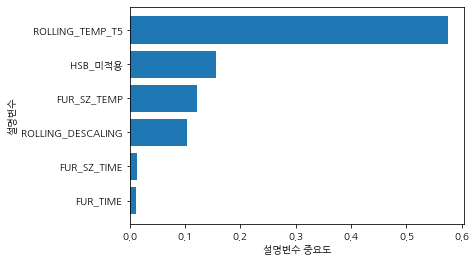

In [118]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_temp.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_temp))
plt.barh(y = coordinates, width = df_temp["Importance"])
plt.yticks(coordinates, df_temp["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# XG 부스트

In [120]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 평가 함수
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [121]:
# sklearn XGBoost 모델의 조기 중단 : fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# max_depth, learning_rate(학습률), 반복횟수 등 지정
# 오류함수의 평가지표:logloss
# 조기중단을 위한 최소 반복횟수는 150

xgb_stop = XGBClassifier(n_estimators = 110, learning_rate = 0.1 , max_depth = 3)

eval_df = [(df_train_x, df_train_y)]

xgb_stop.fit(x_resampled, y_resampled, early_stopping_rounds = 150, 
                eval_metric="logloss", eval_set = eval_df, verbose=True)

[0]	validation_0-logloss:0.62436
[1]	validation_0-logloss:0.56720
[2]	validation_0-logloss:0.51909
[3]	validation_0-logloss:0.47819
[4]	validation_0-logloss:0.44500
[5]	validation_0-logloss:0.41430
[6]	validation_0-logloss:0.38654
[7]	validation_0-logloss:0.36262
[8]	validation_0-logloss:0.34117
[9]	validation_0-logloss:0.32194
[10]	validation_0-logloss:0.30469
[11]	validation_0-logloss:0.28922
[12]	validation_0-logloss:0.27542
[13]	validation_0-logloss:0.26249
[14]	validation_0-logloss:0.25135
[15]	validation_0-logloss:0.24057
[16]	validation_0-logloss:0.23188
[17]	validation_0-logloss:0.22447
[18]	validation_0-logloss:0.21570
[19]	validation_0-logloss:0.20942
[20]	validation_0-logloss:0.19937
[21]	validation_0-logloss:0.19283
[22]	validation_0-logloss:0.18654
[23]	validation_0-logloss:0.17824
[24]	validation_0-logloss:0.17378
[25]	validation_0-logloss:0.16836
[26]	validation_0-logloss:0.16225
[27]	validation_0-logloss:0.15847
[28]	validation_0-logloss:0.15503
[29]	validation_0-loglos

/home/piai/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-logloss:0.12916
[36]	validation_0-logloss:0.12685
[37]	validation_0-logloss:0.12424
[38]	validation_0-logloss:0.12165
[39]	validation_0-logloss:0.11899
[40]	validation_0-logloss:0.11709
[41]	validation_0-logloss:0.11406
[42]	validation_0-logloss:0.11177
[43]	validation_0-logloss:0.10639
[44]	validation_0-logloss:0.10418
[45]	validation_0-logloss:0.09948
[46]	validation_0-logloss:0.09774
[47]	validation_0-logloss:0.09578
[48]	validation_0-logloss:0.09153
[49]	validation_0-logloss:0.08988
[50]	validation_0-logloss:0.08861
[51]	validation_0-logloss:0.08737
[52]	validation_0-logloss:0.08581
[53]	validation_0-logloss:0.08428
[54]	validation_0-logloss:0.08275
[55]	validation_0-logloss:0.08104
[56]	validation_0-logloss:0.07796
[57]	validation_0-logloss:0.07657
[58]	validation_0-logloss:0.07535
[59]	validation_0-logloss:0.07405
[60]	validation_0-logloss:0.07301
[61]	validation_0-logloss:0.07179
[62]	validation_0-logloss:0.06812
[63]	validation_0-logloss:0.06716
[64]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=110, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [122]:
# 조기 중단 예측 및 모델 평가:Train  
xgb_pred_stop = xgb_stop.predict(df_train_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_train_y, xgb_pred_stop)
print('\n',classification_report(df_train_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[344   0]
 [  0 160]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       344
           1       1.00      1.00      1.00       160

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



# 도식화 추가할 곳

In [124]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = xgb_stop.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_temp = df_importance.round(3).head(6)
df_temp

,Feature,Importance
11,ROLLING_TEMP_T5,0.239
92,HSB_적용,0.179
7,FUR_SZ_TEMP,0.089
90,FUR_NO_3호기,0.089
12,ROLLING_DESCALING,0.067
10,FUR_EXTEMP,0.043


Text(0, 0.5, '설명변수')

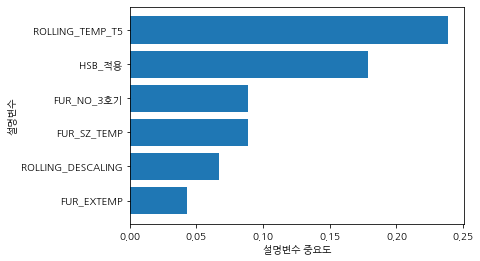

In [125]:
# 설명변수 중요도 그래프
# sort_values : 중요도가 높은 변수를 상위에 그림. 
df_temp.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_temp))
plt.barh(y = coordinates, width = df_temp["Importance"])
plt.yticks(coordinates, df_temp["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# KNN

In [ ]:
estimator = KNeighborsClassifier()

# 구하고자 하는 parameter와 범위
grid_params = {
    'n_neighbors' : list(range(1,10)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}
# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, grid_params, scoring="accuracy", n_jobs = -1)
grid_rf.fit(x_resampled, y_resampled)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

In [ ]:
print(grid_rf.score(df_train_x, df_train_y))
print(grid_rf.score(df_test_x, df_test_y))